In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels

In [3]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/AIML_PRACTICE/time series/monthly-beer-production-in-austr.csv')
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [6]:
df = df.set_index(df['Month'])

In [7]:
df.head()

,Month,Monthly beer production
Month,,
1956-01,1956-01,93.2
1956-02,1956-02,96.0
1956-03,1956-03,95.2
1956-04,1956-04,77.1
1956-05,1956-05,70.9


In [8]:
df = df.drop('Month',axis=1)

In [9]:
df.head()

,Monthly beer production
Month,
1956-01,93.2
1956-02,96.0
1956-03,95.2
1956-04,77.1
1956-05,70.9


In [30]:
df.tail()

,Monthly beer production
Month,
1995-04,127.0
1995-05,151.0
1995-06,130.0
1995-07,119.0
1995-08,153.0


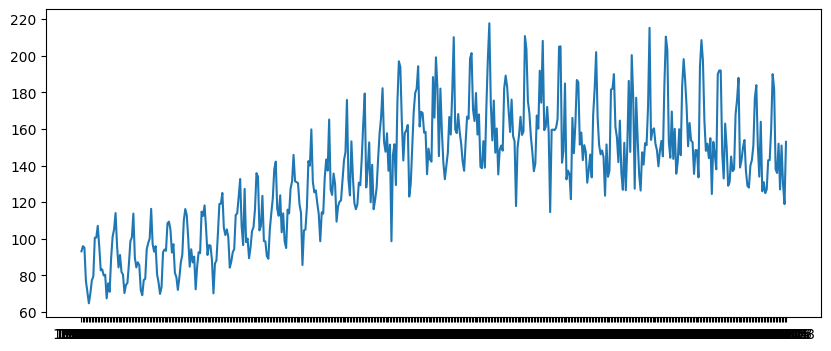

In [10]:
plt.figure(figsize=(10,4))
plt.plot(df['Monthly beer production'])
plt.show()

In [12]:
df.shape

(476, 1)

In [16]:
rolling_mean = df['Monthly beer production'].rolling(window=10).mean()

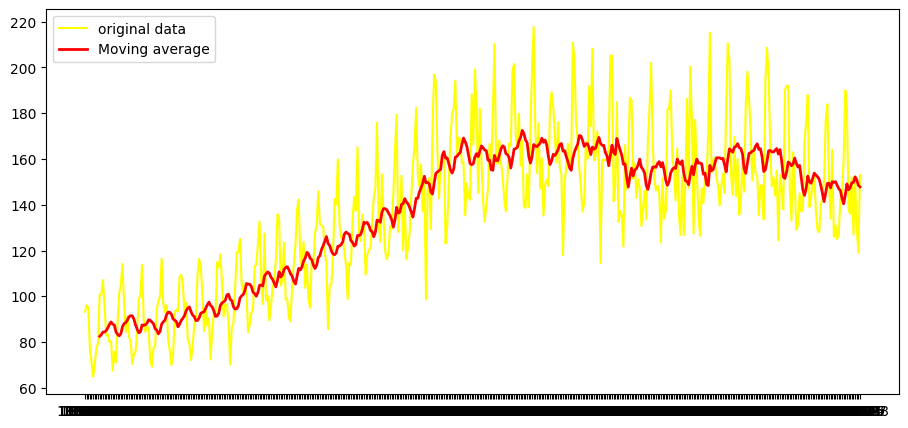

In [19]:
plt.figure(figsize=(11,5))
plt.plot(df['Monthly beer production'],label = 'original data',color='yellow')
plt.plot(rolling_mean,lw=2,color='red',label = 'Moving average')
plt.legend()
plt.show()

In [20]:
results = adfuller(df['Monthly beer production'])
print(f'p-value: {results[1]}')

p-value: 0.17762099829132505


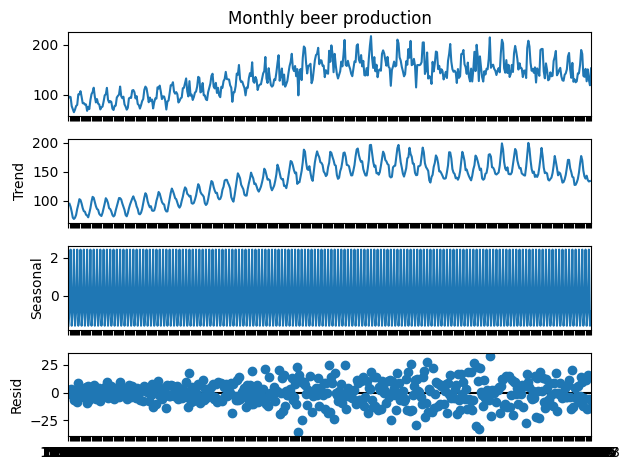

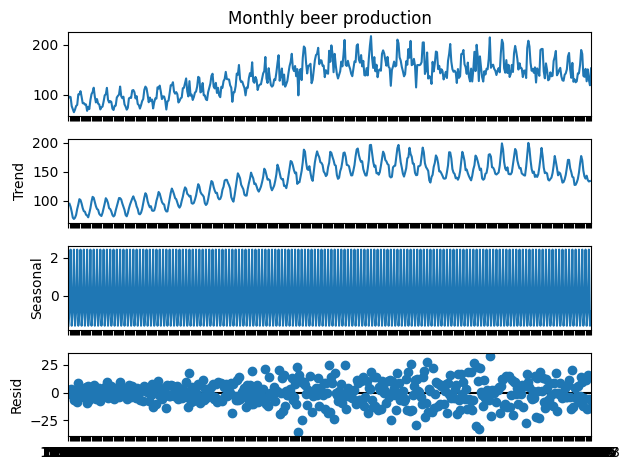

In [21]:
decom = seasonal_decompose(df['Monthly beer production'],model='additive',period=3)
decom.plot()

<Figure size 640x480 with 0 Axes>

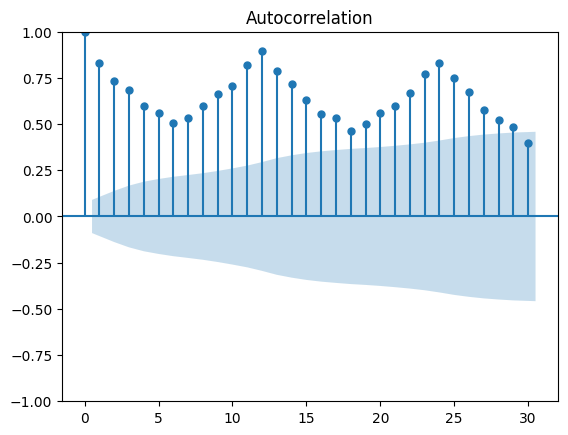

In [25]:
plt.figure()
plot_acf(df['Monthly beer production'],lags = 30)
plt.show()


<Figure size 640x480 with 0 Axes>

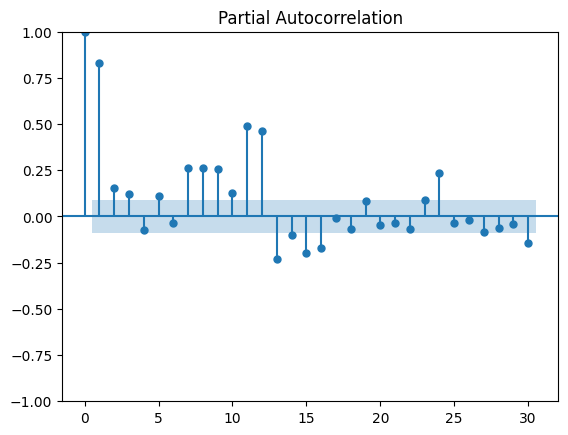

In [26]:
plt.figure()
plot_pacf(df['Monthly beer production'],lags = 30)
plt.show()

In [28]:
model = ARIMA(df['Monthly beer production'],order=(1,0,0))
fit_model = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [29]:
print(fit_model.summary())

                                  SARIMAX Results                                  
Dep. Variable:     Monthly beer production   No. Observations:                  476
Model:                      ARIMA(1, 0, 0)   Log Likelihood               -2072.032
Date:                     Sat, 31 Jan 2026   AIC                           4150.065
Time:                             09:14:31   BIC                           4162.561
Sample:                         01-01-1956   HQIC                          4154.978
                              - 08-01-1995                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        136.1251      5.681     23.961      0.000     124.990     147.260
ar.L1          0.8303      0.029     28.961      0.000       0.774       0.886
sigma2      

In [56]:
future_dates = pd.date_range(start = '1995-08',periods=60,freq='MS')
future_dates

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01', '1997-02-01', '1997-03-01',
               '1997-04-01', '1997-05-01', '1997-06-01', '1997-07-01',
               '1997-08-01', '1997-09-01', '1997-10-01', '1997-11-01',
               '1997-12-01', '1998-01-01', '1998-02-01', '1998-03-01',
               '1998-04-01', '1998-05-01', '1998-06-01', '1998-07-01',
               '1998-08-01', '1998-09-01', '1998-10-01', '1998-11-01',
               '1998-12-01', '1999-01-01', '1999-02-01', '1999-03-01',
               '1999-04-01', '1999-05-01', '1999-06-01', '1999-07-01',
               '1999-08-01', '1999-09-01', '1999-10-01', '1999-11-01',
               '1999-12-01', '2000-01-01', '2000-02-01', '2000-03-01',
      

In [57]:
forecast = fit_model.forecast(steps=60)
forecast.index = future_dates

In [58]:
df.index = pd.to_datetime(df.index)

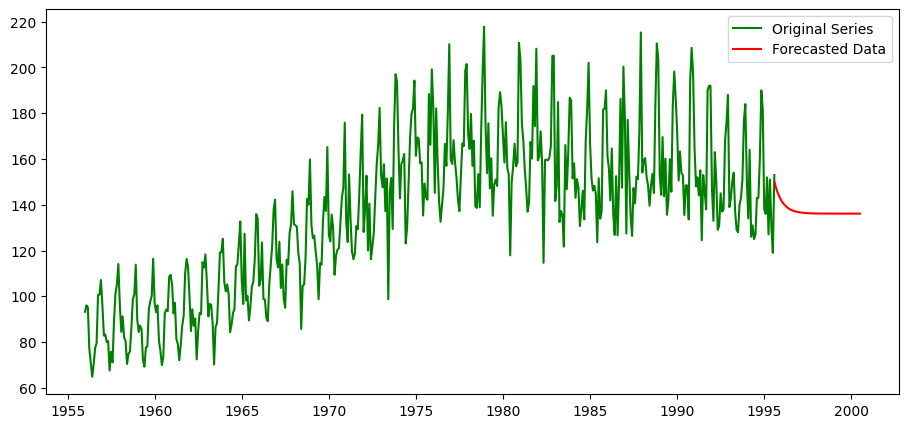

In [59]:
plt.figure(figsize=(11,5))
plt.plot(df['Monthly beer production'],label = 'Original Series',color='green')
plt.plot(forecast,label = 'Forecasted Data',color = 'red')
plt.legend()
plt.show()

In [60]:
# Sarima model

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    df['Monthly beer production'],
    order=(1,1,1),
    seasonal_order=(1,1,1,12)
)

fit_model = model.fit()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [62]:
forecast = fit_model.get_forecast(steps=24)
forecast_series = forecast.predicted_mean
conf_int = forecast.conf_int()

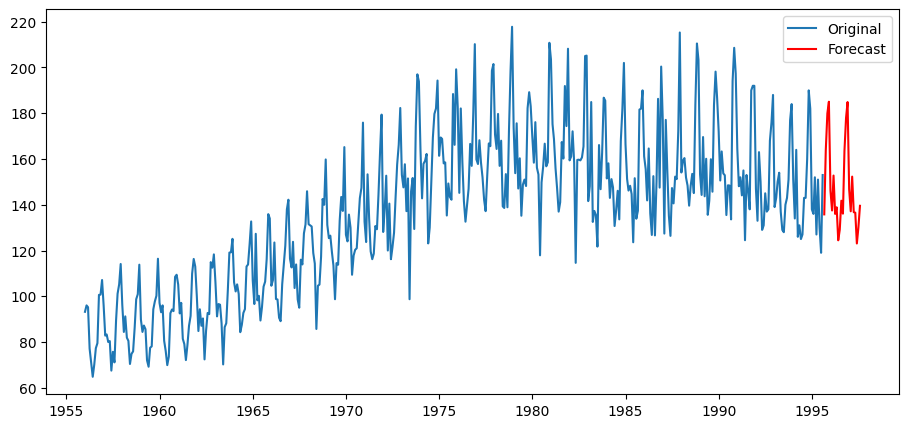

In [65]:
plt.figure(figsize=(11,5))
plt.plot(df['Monthly beer production'], label='Original')
plt.plot(forecast_series, label='Forecast', color='red')
plt.legend()
plt.show()


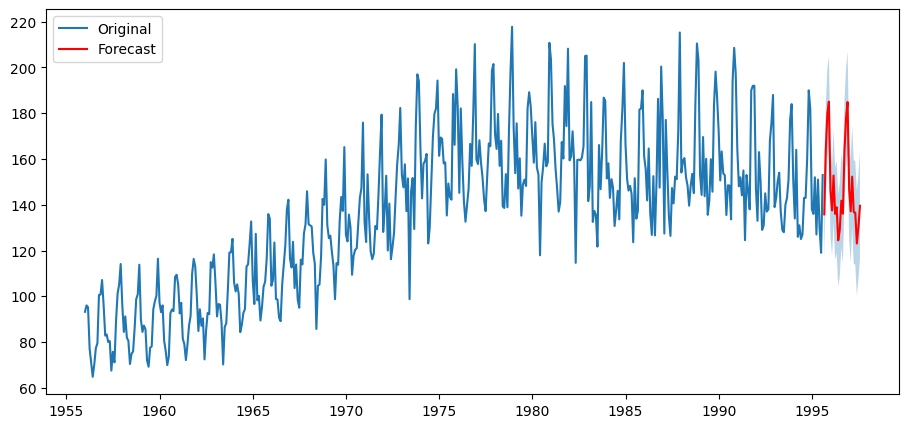

In [66]:
plt.figure(figsize=(11,5))
plt.plot(df['Monthly beer production'], label='Original')
plt.plot(forecast_series, label='Forecast', color='red')
plt.fill_between(
    forecast_series.index,
    conf_int.iloc[:,0],
    conf_int.iloc[:,1],
    alpha=0.3
)
plt.legend()
plt.show()